In [1]:
import sys
sys.path.insert(0, 'D:\Workspace\workspace_masterarbeit\PainLevelShiftDetection\Classes')

import warnings
warnings.filterwarnings('ignore')


from models import ClassificationModel, EmbeddingsModel, SiameseModel
from trainer import SiameseTrainerThreeClass, all_subjects, all_subjects_intense

import numpy as np

In [2]:
subjects_test = all_subjects_intense[:1]
subjects_train = [sub for sub in all_subjects_intense if sub not in subjects_test]

In [3]:
trainer_hyperparameter = {
    "path": "D:\Workspace\workspace_masterarbeit\PainLevelShiftDetection\FeatureGeneration\dataset_processed\INTENSE2\\normalized_subjects.pkl",
    "subjects_train": subjects_train,
    "subjects_test": subjects_test,
    "intense_dataset": True,
    "indices1_train": 1,
    "indices2_train": 1,
    "indices1_test": 1,
    "indices2_test": 0,
    "wandb": False,
    "log": True,
    "learning_rate": 0.001,
    "batch_size": 256,
    "batch_size_test": 256,
    "freeze_embed": False,
    "decision_function": 3,
    "filter": [],
    "weight_decay": 0,
    "lr_steps": 10,
    "number_steps": 50,
    "number_steps_testing": 50
}

model_embedding_hyperparameter = {
        "sigmoid": False,
        "dropout": 0.35,
        "layers": [207, 512, 64]
}

model_classifier_hyperparameter = {
    "dropout": 0.35,
    "layers": [64, 32],
    "head_type": 2
}

In [4]:
classifier_model = ClassificationModel(model_classifier_hyperparameter)
embedding_model = EmbeddingsModel(model_embedding_hyperparameter)

siamese_model = SiameseModel(embedding_model, classifier_model, decision_function=trainer_hyperparameter["decision_function"])

In [5]:
filter = lambda data: data["label"].isin(trainer_hyperparameter["filter"])
trainer = SiameseTrainerThreeClass(trainer_hyperparameter, siamese_model, device="cuda:0", filter=None)

In [6]:
trainer.trainloop(30)

epoch: 1 | train_acc: 0.4427 | test_acc: 0.5
epoch: 2 | train_acc: 0.5307 | test_acc: 0.5625
epoch: 3 | train_acc: 0.5756 | test_acc: 0.8125
epoch: 4 | train_acc: 0.6429 | test_acc: 0.8125
epoch: 5 | train_acc: 0.6661 | test_acc: 0.75
epoch: 6 | train_acc: 0.6769 | test_acc: 0.75
epoch: 7 | train_acc: 0.7035 | test_acc: 0.75
epoch: 8 | train_acc: 0.7251 | test_acc: 0.75
epoch: 9 | train_acc: 0.7434 | test_acc: 0.75
epoch: 10 | train_acc: 0.755 | test_acc: 0.75
epoch: 11 | train_acc: 0.7375 | test_acc: 0.8125
epoch: 12 | train_acc: 0.75 | test_acc: 0.8125
epoch: 13 | train_acc: 0.7517 | test_acc: 0.8125
epoch: 14 | train_acc: 0.7566 | test_acc: 0.8125
epoch: 15 | train_acc: 0.7483 | test_acc: 0.8125
epoch: 16 | train_acc: 0.7575 | test_acc: 0.8125
epoch: 17 | train_acc: 0.7683 | test_acc: 0.8125
epoch: 18 | train_acc: 0.789 | test_acc: 0.8125
epoch: 19 | train_acc: 0.7542 | test_acc: 0.8125
epoch: 20 | train_acc: 0.7782 | test_acc: 0.8125
epoch: 21 | train_acc: 0.7674 | test_acc: 0.8125

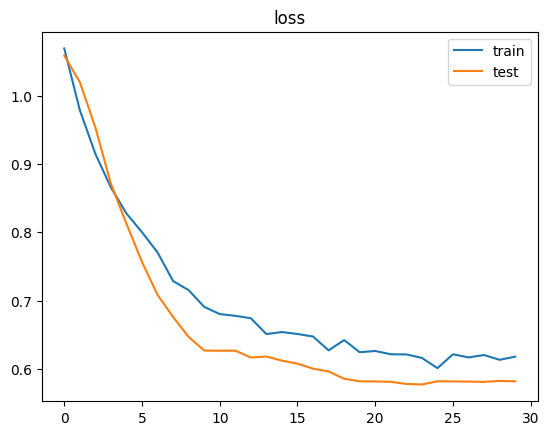

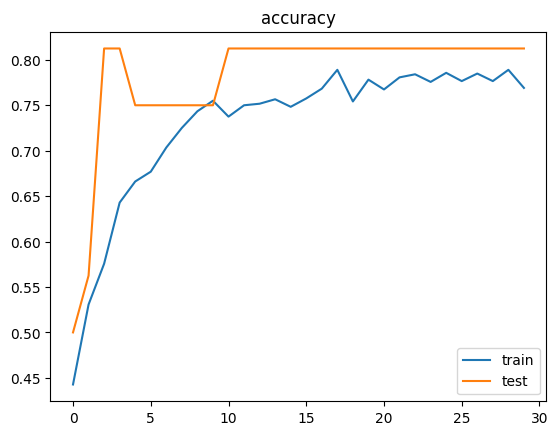

In [7]:
trainer.plot_history()

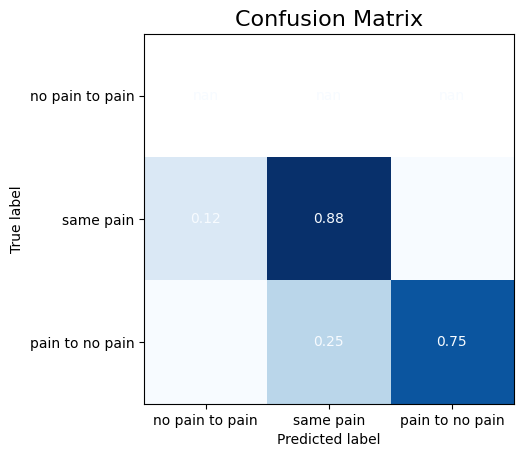

In [8]:
trainer.plot_cm()